In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# NBA season we will be analyzing
year = 2022
# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

stats = pd.DataFrame(player_stats, columns = headers)

In [10]:
import re
import string
alphabet = list(string.ascii_lowercase)
list_of_dfs = []

for letter in alphabet:
    try:
        url = "https://www.basketball-reference.com/players/{}".format(letter)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)

        headers = [th.getText() for th in soup.findAll('tr')[0].findAll('th')]
        headers = headers

        rows = soup.findAll('tr')

        player_names = [[td.getText() for td in rows[i].findAll('th')]
                    for i in range(len(rows))]

        names = pd.DataFrame(player_names, columns = headers)

        player_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]


        stats = pd.DataFrame(player_stats, columns = headers[1:])
        stats['Player'] = names['Player']
        indexes = []
        for i in range(0, len(rows)):
            index = rows[i].find('th').get('data-append-csv')
            indexes.append(index)
        stats['index'] = indexes

        list_of_dfs.append(stats)
    except:
        continue

In [11]:
new_df = pd.concat(list_of_dfs)
new_df = new_df[1:]
players22 = new_df.loc[new_df['To'] >= '2022']
players22_name = list(new_df.loc[new_df['To'] >= '2022']['Player'])
players22_id = list(new_df.loc[new_df['To'] >= '2022']['index'])
for i in range(len(players22_name)):
    if players22_name[i] == 'Luka Dončić':
        players22_name[i] = 'Luka Doncic'
player_names_ids = []
for i, x in enumerate(players22_name):
    player_names_ids.append([x, players22_id[i]])

In [12]:
def index_2d(myList, v):
    for i, x in enumerate(myList):
        if v in x:
            return i

In [13]:
player = input("Enter the player: ")
year = input("Enter the year:")
id_index = index_2d(player_names_ids, player)
id = player_names_ids[id_index][1]
letter = id[0]
# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/players/{}/{}/gamelog/{}/".format(letter, id, year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)
headers = []
tabs = 0
while (len(headers) == 0):
        headers = [th.getText() for th in soup.findAll('tr')[tabs].findAll('th')]
        headers = headers[1:]
        tabs = tabs + 1

In [14]:
rows = soup.findAll('tr')[tabs:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
        for i in range(len(rows))]

stats_average = pd.DataFrame(player_stats, columns = headers)
clean_stats = stats_average.dropna()
clean_stats.head(5)

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2021-10-21,22-235,DAL,@,ATL,L (-26),1,35:24,6,...,11,11,7,1,0,5,1,18,12.3,-24
1,2,2021-10-23,22-237,DAL,@,TOR,W (+8),1,38:53,11,...,9,9,12,0,1,5,3,27,19.4,+1
2,3,2021-10-26,22-240,DAL,,HOU,W (+10),1,34:16,10,...,12,14,7,2,1,4,3,26,19.9,+15
3,4,2021-10-28,22-242,DAL,,SAS,W (+5),1,34:20,11,...,3,3,5,0,1,7,3,25,11.8,-19
4,5,2021-10-29,22-243,DAL,@,DEN,L (-31),1,26:25,5,...,6,6,4,2,0,2,1,16,9.6,-32


In [15]:
clean_stats['FG'] = clean_stats['FG'].astype(int)
clean_stats['FGA'] = clean_stats['FGA'].astype(int)
clean_stats['3P'] = clean_stats['3P'].astype(int)
clean_stats['3PA'] = clean_stats['3PA'].astype(int)
clean_stats['TRB'] = clean_stats['TRB'].astype(int)
clean_stats['FT'] = clean_stats['FT'].astype(int)
clean_stats['FTA'] = clean_stats['FTA'].astype(int)
clean_stats['AST'] = clean_stats['AST'].astype(int)
clean_stats['STL'] = clean_stats['STL'].astype(int)
clean_stats['BLK'] = clean_stats['BLK'].astype(int)
clean_stats['TOV'] = clean_stats['TOV'].astype(int)
clean_stats['PTS'] = clean_stats['PTS'].astype(int)

/var/folders/28/lsql7v0120v8k73zmyv8t27r0000gn/T/ipykernel_19940/1088186202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_stats['FG'] = clean_stats['FG'].astype(int)
/var/folders/28/lsql7v0120v8k73zmyv8t27r0000gn/T/ipykernel_19940/1088186202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_stats['FGA'] = clean_stats['FGA'].astype(int)
/var/folders/28/lsql7v0120v8k73zmyv8t27r0000gn/T/ipykernel_19940/1088186202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Luka Doncic Medians
Pts: 27.0
Rebs: 9.0
Ast: 9.0
3P: 3.0
PTS+Rebs+Asts: 45.0
PTS+Asts: 36.0


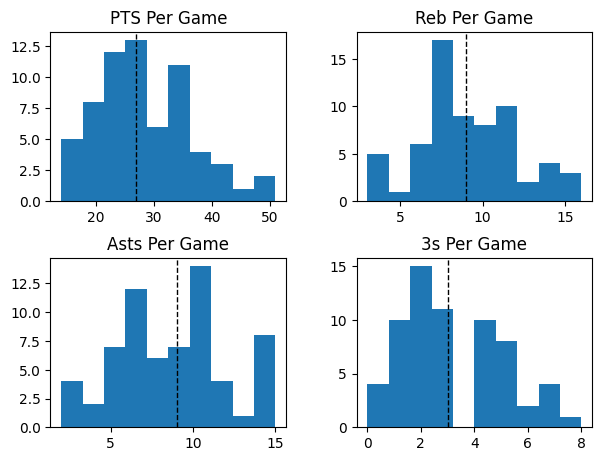

In [16]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
axs[0, 0].hist(clean_stats['PTS'])
axs[0, 0].axvline(clean_stats['PTS'].median(), color='k', linestyle='dashed', linewidth=1)
axs[0, 0].set_title('PTS Per Game')
axs[0, 1].hist(clean_stats['TRB'])
axs[0, 1].axvline(clean_stats['TRB'].median(), color='k', linestyle='dashed', linewidth=1)
axs[0, 1].set_title('Reb Per Game')
axs[1, 0].hist(clean_stats['AST'])
axs[1, 0].axvline(clean_stats['AST'].median(), color='k', linestyle='dashed', linewidth=1)
axs[1, 0].set_title('Asts Per Game')
axs[1, 1].hist(clean_stats['3P'])
axs[1, 1].axvline(clean_stats['3P'].median(), color='k', linestyle='dashed', linewidth=1)
axs[1, 1].set_title('3s Per Game')

med_pts = clean_stats['PTS'].median()
med_rebs = clean_stats['TRB'].median()
med_ast = clean_stats['AST'].median()
med_3p = clean_stats['3P'].median()


print("{} Medians".format(player))
print("Pts:", med_pts)
print("Rebs:", med_rebs)
print("Ast:", med_ast)
print("3P:", med_3p)
print("PTS+Rebs+Asts:", med_pts+med_ast+med_rebs)
print("PTS+Asts:", med_pts+med_ast)